In [22]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, optimizers, regularizers
import matplotlib.pyplot as plt

In [23]:
from keras.datasets import mnist
(train_images, train_labels), _ = mnist.load_data()

In [24]:
train_images.shape

(60000, 28, 28)

In [25]:
train_images = train_images.reshape((60000, 28 * 28))

In [26]:
print(train_images.shape)

(60000, 784)


In [27]:
train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)

In [28]:
train_images_with_noise_channels.shape

(60000, 1568)

In [29]:
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)
train_images_with_zeros_channels.shape

(60000, 1568)

In [30]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model


In [31]:
model = get_model()

In [32]:
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8174 - loss: 17.5035 - val_accuracy: 0.9379 - val_loss: 0.7390
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9465 - loss: 0.5788 - val_accuracy: 0.9436 - val_loss: 0.5660
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9606 - loss: 0.3850 - val_accuracy: 0.9555 - val_loss: 0.6189
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9700 - loss: 0.3257 - val_accuracy: 0.9586 - val_loss: 0.6151
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9726 - loss: 0.2805 - val_accuracy: 0.9607 - val_loss: 0.6388
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9778 - loss: 0.2563 - val_accuracy: 0.9586 - val_loss: 0.7139
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9818 - loss: 0.2022 - val_accuracy: 0.9659 - val_loss: 0.6995
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9827 - loss: 0.2149 - val_accuracy: 0

In [33]:
model = get_model()

In [34]:
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8151 - loss: 21.5173 - val_accuracy: 0.9452 - val_loss: 0.7934
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9479 - loss: 0.6963 - val_accuracy: 0.9586 - val_loss: 0.6703
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9651 - loss: 0.4368 - val_accuracy: 0.9472 - val_loss: 0.9570
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9726 - loss: 0.3575 - val_accuracy: 0.9586 - val_loss: 0.7429
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9763 - loss: 0.3223 - val_accuracy: 0.9649 - val_loss: 0.7042
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9817 - loss: 0.2213 - val_accuracy: 0.9681 - val_loss: 0.5883
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9837 - loss: 0.2015 - val_accuracy: 0.9709 - val_loss: 0.7225
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9841 - loss: 0.1986 - val_accuracy: 

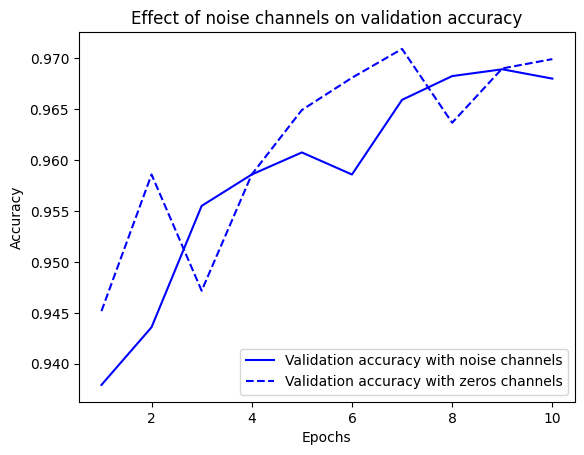

In [35]:
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()


In [36]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

In [37]:
random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

In [38]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1004 - loss: 2.3335 - val_accuracy: 0.1032 - val_loss: 2.3060
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1156 - loss: 2.2980 - val_accuracy: 0.1088 - val_loss: 2.3063
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1242 - loss: 2.2909 - val_accuracy: 0.1069 - val_loss: 2.3163
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.1402 - loss: 2.2778 - val_accuracy: 0.1049 - val_loss: 2.3237
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1514 - loss: 2.2630 - val_accuracy: 0.0993 - val_loss: 2.3326
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1647 - loss: 2.2425 - val_accuracy: 0.1028 - val_loss: 2.3394
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1795 - loss: 2.2213 - val_accuracy: 0.1018 - val_loss: 2.3596
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1936 - loss: 2.1957 - val_accu

In [39]:
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


In [52]:
(train_images, train_labels), _ = mnist.load_data()

In [54]:
train_images = np.array(train_images).reshape((60000, 28 * 28))
train_labels = np.array(train_labels).reshape((60000,))
print(train_images.shape)
print(train_labels.shape)

(60000, 784)
(60000,)


In [55]:
model = keras.Sequential([
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6767 - loss: 27.6220 - val_accuracy: 0.8614 - val_loss: 6.6398
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 5.8415 - val_accuracy: 0.8875 - val_loss: 4.8456
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8799 - loss: 4.6235 - val_accuracy: 0.8963 - val_loss: 4.2010
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 4.3258 - val_accuracy: 0.8841 - val_loss: 4.2555
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8807 - loss: 4.0452 - val_accuracy: 0.9009 - val_loss: 3.6899
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8855 - loss: 3.8916 - val_accuracy: 0.8758 - val_loss: 4.4531
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8874 - loss: 3.6544 - val_accuracy: 0.9014 - val_loss: 3.4660
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 3.5909 - val_accuracy: 0

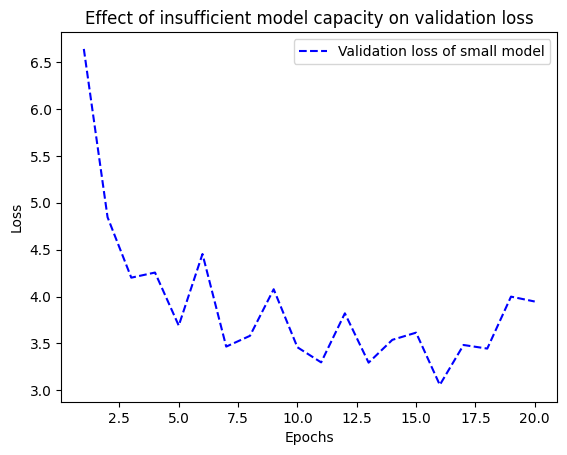

In [56]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of small model")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [57]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7420 - loss: 7.9831 - val_accuracy: 0.9018 - val_loss: 0.7807
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9106 - loss: 0.6070 - val_accuracy: 0.9268 - val_loss: 0.4947
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9386 - loss: 0.3864 - val_accuracy: 0.9334 - val_loss: 0.3703
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9482 - loss: 0.2706 - val_accuracy: 0.9449 - val_loss: 0.3561
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9587 - loss: 0.2245 - val_accuracy: 0.9482 - val_loss: 0.3526
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9622 - loss: 0.2060 - val_accuracy: 0.9491 - val_loss: 0.3237
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9692 - loss: 0.1609 - val_accuracy: 0.9538 - val_loss: 0.3235
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9704 - loss: 0.1498 - val_accuracy: 0.

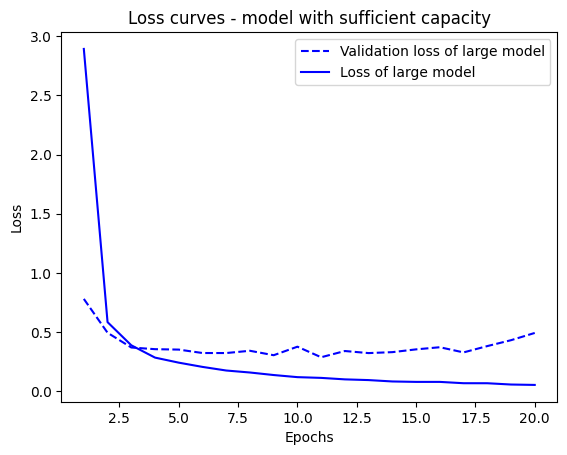

In [58]:
val_loss = history_large_model.history["val_loss"]
loss = history_large_model.history["loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss of large model")
plt.plot(epochs, loss, "b-",
         label="Loss of large model")
plt.title("Loss curves - model with sufficient capacity")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [59]:
from keras.datasets import imdb

In [61]:
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

In [62]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [63]:
train_data = vectorize_sequences(train_data)

In [67]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7027 - loss: 0.6281 - val_accuracy: 0.8569 - val_loss: 0.4442
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8842 - loss: 0.3887 - val_accuracy: 0.8786 - val_loss: 0.3410
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9089 - loss: 0.2811 - val_accuracy: 0.8790 - val_loss: 0.3079
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9269 - loss: 0.2254 - val_accuracy: 0.8830 - val_loss: 0.2923
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9394 - loss: 0.1841 - val_accuracy: 0.8875 - val_loss: 0.2781
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9487 - loss: 0.1592 - val_accuracy: 0.8889 - val_loss: 0.2789
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9602 - loss: 0.1311 - val_accuracy: 0.8844 - val_loss: 0.2938
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9647 - loss: 0.1139 - val_accuracy: 0.8752 - v

In [68]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6061 - loss: 0.6807 - val_accuracy: 0.8394 - val_loss: 0.6298
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8363 - loss: 0.6053 - val_accuracy: 0.8408 - val_loss: 0.5584
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8713 - loss: 0.5299 - val_accuracy: 0.8419 - val_loss: 0.4951
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8938 - loss: 0.4583 - val_accuracy: 0.8558 - val_loss: 0.4405
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9071 - loss: 0.3925 - val_accuracy: 0.8801 - val_loss: 0.3878
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9161 - loss: 0.3394 - val_accuracy: 0.8757 - val_loss: 0.3551
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9231 - loss: 0.2930 - val_accuracy: 0.8843 - val_loss: 0.3239
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9352 - loss: 0.2538 - val_accuracy: 0.8888 - v

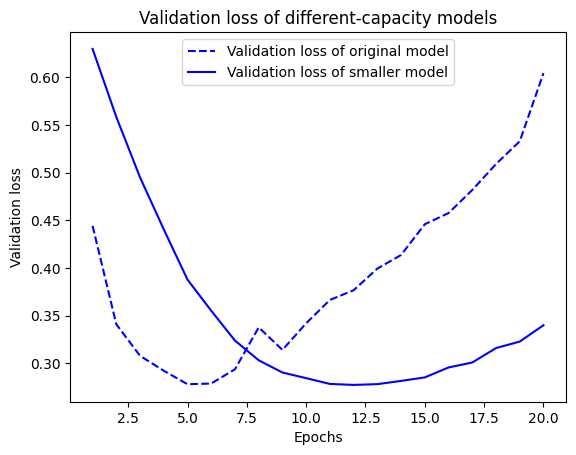

In [69]:
original_model_loss = history_original.history["val_loss"]
smaller_model_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_model_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, smaller_model_loss, "b-",
         label="Validation loss of smaller model")
plt.title("Validation loss of different-capacity models")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

In [70]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.6541 - loss: 0.6280 - val_accuracy: 0.8658 - val_loss: 0.3459
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.8669 - loss: 0.3229 - val_accuracy: 0.8735 - val_loss: 0.3035
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9121 - loss: 0.2231 - val_accuracy: 0.8885 - val_loss: 0.2726
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9324 - loss: 0.1743 - val_accuracy: 0.8657 - val_loss: 0.3359
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9458 - loss: 0.1408 - val_accuracy: 0.8878 - val_loss: 0.2923
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9731 - loss: 0.0869 - val_accuracy: 0.8816 - val_loss: 0.3412
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9858 - loss: 0.0567 - val_accuracy: 0.8861 - val_loss: 0.3250
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9920 - loss: 0.0376 - val_accuracy: 0.8859 - 

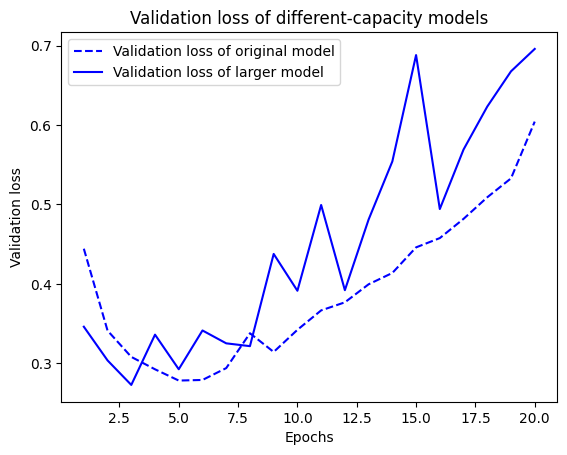

In [71]:
original_model_loss = history_original.history["val_loss"]
larger_model_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_model_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, larger_model_loss, "b-",
         label="Validation loss of larger model")
plt.title("Validation loss of different-capacity models")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

In [73]:
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.7196 - loss: 0.6820 - val_accuracy: 0.8718 - val_loss: 0.4816
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8915 - loss: 0.4339 - val_accuracy: 0.8839 - val_loss: 0.4001
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9121 - loss: 0.3517 - val_accuracy: 0.8861 - val_loss: 0.3707
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9237 - loss: 0.3063 - val_accuracy: 0.8890 - val_loss: 0.3597
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9360 - loss: 0.2769 - val_accuracy: 0.8879 - val_loss: 0.3573
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9419 - loss: 0.2615 - val_accuracy: 0.8862 - val_loss: 0.3577
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9456 - loss: 0.2494 - val_accuracy: 0.8771 - val_loss: 0.3793
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9457 - loss: 0.2423 - val_accuracy: 0.8840 - v

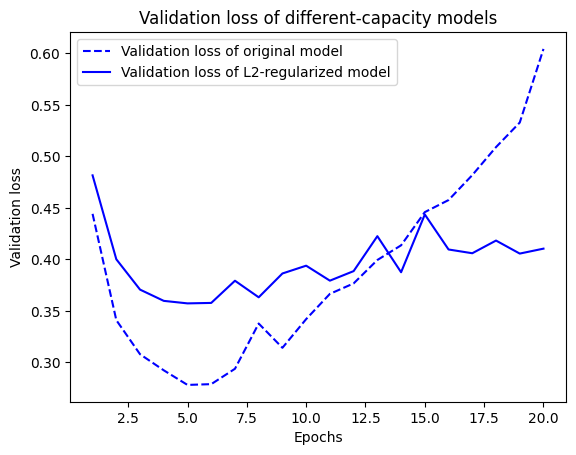

In [74]:
original_model_loss = history_original.history["val_loss"]
reg_model_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_model_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, reg_model_loss, "b-",
         label="Validation loss of L2-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()

In [75]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5612 - loss: 0.6738 - val_accuracy: 0.8347 - val_loss: 0.5300
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7316 - loss: 0.5504 - val_accuracy: 0.8723 - val_loss: 0.4148
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8019 - loss: 0.4598 - val_accuracy: 0.8764 - val_loss: 0.3496
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8455 - loss: 0.3904 - val_accuracy: 0.8805 - val_loss: 0.3119
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8807 - loss: 0.3331 - val_accuracy: 0.8815 - val_loss: 0.2943
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8993 - loss: 0.2918 - val_accuracy: 0.8915 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9164 - loss: 0.2564 - val_accuracy: 0.8935 - val_loss: 0.2693
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9212 - loss: 0.2332 - val_accuracy: 0.8921 - v

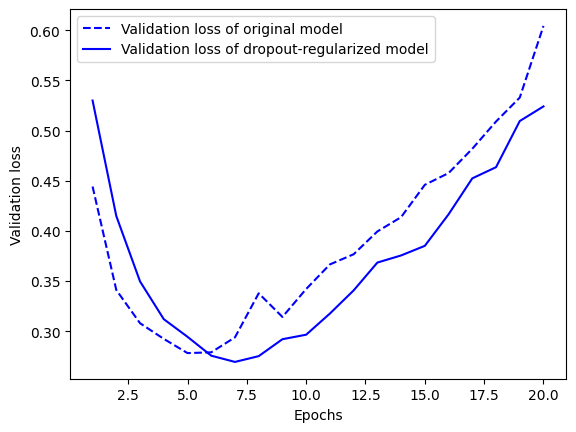

In [76]:
original_model_loss = history_original.history["val_loss"]
dropout_model_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, original_model_loss, "b--",
         label="Validation loss of original model")
plt.plot(epochs, dropout_model_loss, "b-",
         label="Validation loss of dropout-regularized model")
plt.xlabel("Epochs")
plt.ylabel("Validation loss")
plt.legend()